## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


Using TensorFlow backend.
C:\Users\User\.conda\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\.conda\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\.conda\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\.conda\envs\tf1-gpu\lib\site-packages\t

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=128, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 227us/step - loss: 1.8801 - accuracy: 0.3242 - val_loss: 1.7209 - val_accuracy: 0.3775
Epoch 2/500
50000/50000 [==============================] - 11s 219us/step - loss: 1.6838 - accuracy: 0.3995 - val_loss: 1.6421 - val_accuracy: 0.4117
Epoch 3/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.5972 - accuracy: 0.4286 - val_loss: 1.5768 - val_accuracy: 0.4495
Epoch 4/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.5292 - accuracy: 0.4514 - val_loss: 1.5428 - val_accuracy: 0.4584
Epoch 5/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.4902 - accuracy: 0.4678 - val_loss: 1.4852 - val_accuracy: 0.4685
Epoch 6/500
50000/50000 [==============================] - 14s 275us/step - loss: 1.4544 - accuracy: 0.4824 - val_loss: 1.4985 - val_accuracy: 0.4689
Epoch 7/500
50000/50000 [========================

50000/50000 [==============================] - 11s 216us/step - loss: 0.6067 - accuracy: 0.7814 - val_loss: 2.1505 - val_accuracy: 0.5059
Epoch 54/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.5995 - accuracy: 0.7838 - val_loss: 2.0765 - val_accuracy: 0.5104
Epoch 55/500
50000/50000 [==============================] - 11s 220us/step - loss: 0.5919 - accuracy: 0.7868 - val_loss: 2.1093 - val_accuracy: 0.5110
Epoch 56/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.5900 - accuracy: 0.7872 - val_loss: 2.1460 - val_accuracy: 0.5132
Epoch 57/500
50000/50000 [==============================] - 11s 230us/step - loss: 0.5647 - accuracy: 0.7973 - val_loss: 2.2230 - val_accuracy: 0.4985
Epoch 58/500
50000/50000 [==============================] - 11s 230us/step - loss: 0.5591 - accuracy: 0.7981 - val_loss: 2.3124 - val_accuracy: 0.5035
Epoch 59/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.5580 - accuracy: 0.799

50000/50000 [==============================] - 15s 291us/step - loss: 0.3004 - accuracy: 0.8907 - val_loss: 3.7283 - val_accuracy: 0.4903
Epoch 108/500
50000/50000 [==============================] - 12s 248us/step - loss: 0.3005 - accuracy: 0.8925 - val_loss: 3.7197 - val_accuracy: 0.4960
Epoch 109/500
50000/50000 [==============================] - 13s 254us/step - loss: 0.3106 - accuracy: 0.8877 - val_loss: 3.8706 - val_accuracy: 0.4838
Epoch 110/500
50000/50000 [==============================] - 11s 230us/step - loss: 0.3355 - accuracy: 0.8792 - val_loss: 3.7057 - val_accuracy: 0.4956
Epoch 111/500
50000/50000 [==============================] - 11s 230us/step - loss: 0.3185 - accuracy: 0.8843 - val_loss: 3.7568 - val_accuracy: 0.4936
Epoch 112/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.3025 - accuracy: 0.8901 - val_loss: 3.7068 - val_accuracy: 0.4949
Epoch 113/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.2882 - accuracy:

Epoch 161/500
50000/50000 [==============================] - 11s 215us/step - loss: 0.2222 - accuracy: 0.9210 - val_loss: 4.9692 - val_accuracy: 0.4918
Epoch 162/500
50000/50000 [==============================] - 11s 225us/step - loss: 0.2310 - accuracy: 0.9187 - val_loss: 5.0077 - val_accuracy: 0.4917
Epoch 163/500
50000/50000 [==============================] - 12s 236us/step - loss: 0.2203 - accuracy: 0.9213 - val_loss: 5.0051 - val_accuracy: 0.4862
Epoch 164/500
50000/50000 [==============================] - 18s 350us/step - loss: 0.2132 - accuracy: 0.9244 - val_loss: 4.7929 - val_accuracy: 0.4858
Epoch 165/500
50000/50000 [==============================] - 18s 355us/step - loss: 0.2171 - accuracy: 0.9232 - val_loss: 5.1423 - val_accuracy: 0.4878
Epoch 166/500
50000/50000 [==============================] - 16s 323us/step - loss: 0.2497 - accuracy: 0.9122 - val_loss: 5.1465 - val_accuracy: 0.4813
Epoch 167/500
50000/50000 [==============================] - 16s 328us/step - loss: 0.23

50000/50000 [==============================] - 11s 211us/step - loss: 0.1532 - accuracy: 0.9460 - val_loss: 5.9541 - val_accuracy: 0.4863
Epoch 215/500
50000/50000 [==============================] - 11s 210us/step - loss: 0.1602 - accuracy: 0.9442 - val_loss: 5.9505 - val_accuracy: 0.4878
Epoch 216/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.2017 - accuracy: 0.9320 - val_loss: 6.0203 - val_accuracy: 0.4872
Epoch 217/500
50000/50000 [==============================] - 11s 213us/step - loss: 0.1851 - accuracy: 0.9354 - val_loss: 5.9379 - val_accuracy: 0.4855
Epoch 218/500
50000/50000 [==============================] - 11s 217us/step - loss: 0.1994 - accuracy: 0.9331 - val_loss: 5.9614 - val_accuracy: 0.4860
Epoch 219/500
50000/50000 [==============================] - 11s 220us/step - loss: 0.1633 - accuracy: 0.9433 - val_loss: 6.0289 - val_accuracy: 0.4921
Epoch 220/500
50000/50000 [==============================] - 12s 236us/step - loss: 0.1913 - accuracy:

Epoch 268/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.1550 - accuracy: 0.9471 - val_loss: 6.6801 - val_accuracy: 0.4908
Epoch 269/500
50000/50000 [==============================] - 12s 234us/step - loss: 0.1369 - accuracy: 0.9541 - val_loss: 6.7106 - val_accuracy: 0.4846
Epoch 270/500
50000/50000 [==============================] - 12s 232us/step - loss: 0.1659 - accuracy: 0.9432 - val_loss: 6.7689 - val_accuracy: 0.4865
Epoch 271/500
50000/50000 [==============================] - 11s 224us/step - loss: 0.1552 - accuracy: 0.9478 - val_loss: 6.7533 - val_accuracy: 0.4842
Epoch 272/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.1325 - accuracy: 0.9537 - val_loss: 6.7771 - val_accuracy: 0.4861
Epoch 273/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.1532 - accuracy: 0.9474 - val_loss: 6.7376 - val_accuracy: 0.4901
Epoch 274/500
50000/50000 [==============================] - 10s 210us/step - loss: 0.17

Epoch 322/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.1950 - accuracy: 0.9384 - val_loss: 7.2548 - val_accuracy: 0.4816
Epoch 323/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.1163 - accuracy: 0.9607 - val_loss: 7.5894 - val_accuracy: 0.4838
Epoch 324/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.1274 - accuracy: 0.9584 - val_loss: 7.5294 - val_accuracy: 0.4880
Epoch 325/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.1635 - accuracy: 0.9472 - val_loss: 7.5650 - val_accuracy: 0.4809
Epoch 326/500
50000/50000 [==============================] - 11s 210us/step - loss: 0.1342 - accuracy: 0.9551 - val_loss: 7.4869 - val_accuracy: 0.4894
Epoch 327/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.0907 - accuracy: 0.9699 - val_loss: 7.5411 - val_accuracy: 0.4830
Epoch 328/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.14

Epoch 376/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.1267 - accuracy: 0.9594 - val_loss: 8.0831 - val_accuracy: 0.4850
Epoch 377/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.1159 - accuracy: 0.9610 - val_loss: 8.1588 - val_accuracy: 0.4864
Epoch 378/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.1165 - accuracy: 0.9613 - val_loss: 8.3951 - val_accuracy: 0.4836
Epoch 379/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.1192 - accuracy: 0.9618 - val_loss: 8.2829 - val_accuracy: 0.4833
Epoch 380/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.1206 - accuracy: 0.9591 - val_loss: 8.6058 - val_accuracy: 0.4807
Epoch 381/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.1181 - accuracy: 0.9616 - val_loss: 8.3135 - val_accuracy: 0.4827
Epoch 382/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.11

Epoch 430/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.1328 - accuracy: 0.9576 - val_loss: 8.6030 - val_accuracy: 0.4873
Epoch 431/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.0744 - accuracy: 0.9752 - val_loss: 9.0354 - val_accuracy: 0.4844
Epoch 432/500
50000/50000 [==============================] - 11s 228us/step - loss: 0.1420 - accuracy: 0.9556 - val_loss: 8.8323 - val_accuracy: 0.4792
Epoch 433/500
50000/50000 [==============================] - 11s 227us/step - loss: 0.1022 - accuracy: 0.9656 - val_loss: 8.8994 - val_accuracy: 0.4885
Epoch 434/500
50000/50000 [==============================] - 11s 224us/step - loss: 0.1303 - accuracy: 0.9602 - val_loss: 9.1145 - val_accuracy: 0.4814
Epoch 435/500
50000/50000 [==============================] - 11s 212us/step - loss: 0.1178 - accuracy: 0.9608 - val_loss: 8.7554 - val_accuracy: 0.4877
Epoch 436/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.10

Epoch 484/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.0900 - accuracy: 0.9707 - val_loss: 9.3520 - val_accuracy: 0.4879
Epoch 485/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.0999 - accuracy: 0.9686 - val_loss: 9.4565 - val_accuracy: 0.4822
Epoch 486/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.0854 - accuracy: 0.9728 - val_loss: 9.5071 - val_accuracy: 0.4804
Epoch 487/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.1480 - accuracy: 0.9563 - val_loss: 9.5206 - val_accuracy: 0.4812
Epoch 488/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.0883 - accuracy: 0.9727 - val_loss: 9.6992 - val_accuracy: 0.4821
Epoch 489/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.1538 - accuracy: 0.9540 - val_loss: 9.4284 - val_accuracy: 0.4865
Epoch 490/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.08

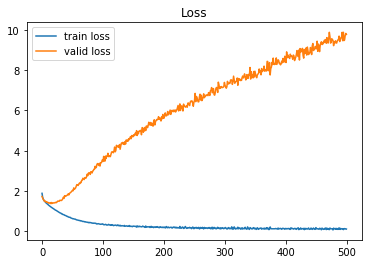

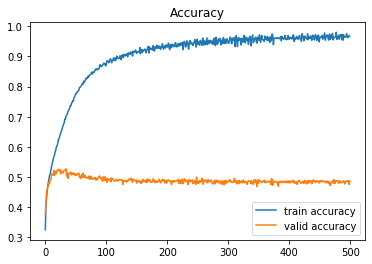

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()